In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
#1)Heart.csv파일 열기
!kaggle datasets download -d ronitf/heart-disease-uci
zf=zipfile.ZipFile('heart-disease-uci.zip')
z=zf.extractall()
df=pd.read_csv('heart.csv')

heart-disease-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


1) Heart Disease UCI (Heart.csv) 데이터를 읽어서 30%를 test set으로 분리

In [3]:
X = df.iloc[:, 0:13]
y = df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

2) 3-NN, Gaussian Naive Bayes, Logistic Regression 분류 알고리즘에 대한 성능 확인

In [4]:
import mglearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Train accuracy : ", train_accuracy)
print("Test accuracy : ", test_accuracy)

Train accuracy :  0.7641509433962265
Test accuracy :  0.6703296703296703


c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbfit = gnb.fit(X_train, y_train)
train_accuracy = gnbfit.score(X_train, y_train)
test_accuracy = gnbfit.score(X_test, y_test)

print("Train accuracy : ", train_accuracy)
print("Test accuracy : ", test_accuracy)

Train accuracy :  0.8443396226415094
Test accuracy :  0.8021978021978022


In [6]:
from sklearn.linear_model import LogisticRegression

logrfit01 = LogisticRegression(C=0.01).fit(X_train, y_train)
train_accuracy = logrfit01.score(X_train, y_train)
test_accuracy = logrfit01.score(X_test, y_test)
print("Train accuracy(C=0.01) : ", train_accuracy)
print("Test accuracy(C=0.01) : ", test_accuracy)

logrfit = LogisticRegression().fit(X_train, y_train)
train_accuracy = logrfit.score(X_train, y_train)
test_accuracy = logrfit.score(X_test, y_test)
print("Train accuracy(C=1) : ", train_accuracy)
print("Test accuracy(C=1) : ", test_accuracy)

logrfit100 = LogisticRegression(C=100).fit(X_train, y_train)
train_accuracy = logrfit100.score(X_train, y_train)
test_accuracy = logrfit100.score(X_test, y_test)
print("Train accuracy(C=100) : ", train_accuracy)
print("Test accuracy(C=100) : ", test_accuracy)

Train accuracy(C=0.01) :  0.8066037735849056
Test accuracy(C=0.01) :  0.7802197802197802
Train accuracy(C=1) :  0.8632075471698113
Test accuracy(C=1) :  0.8021978021978022
Train accuracy(C=100) :  0.8679245283018868
Test accuracy(C=100) :  0.8131868131868132


c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3) Logistic Regression 의 특징 계수(coef)에 대한 그래프를 그리기 (강의자료 10쪽 참고)

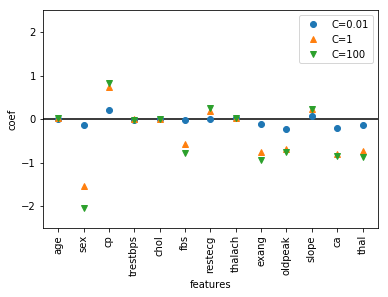

In [7]:
plt.plot(logrfit01.coef_.T, 'o', label = 'C=0.01')
plt.plot(logrfit.coef_.T, '^', label = 'C=1')
plt.plot(logrfit100.coef_.T, 'v', label = 'C=100')
plt.xticks(range(df.iloc[:, 0:13].shape[1]), df.columns, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-2.5, 2.5)
plt.xlabel('features')
plt.ylabel('coef')
plt.legend()